# NLU Demo notebook

The DACCS NLU module transforms Natural Language Queries in climate and earth observation domain to structured queries. 

This notebook showcases the three (3) different baselines of the NLU DACCS module, and executes the structured queries against a STAC catalog.

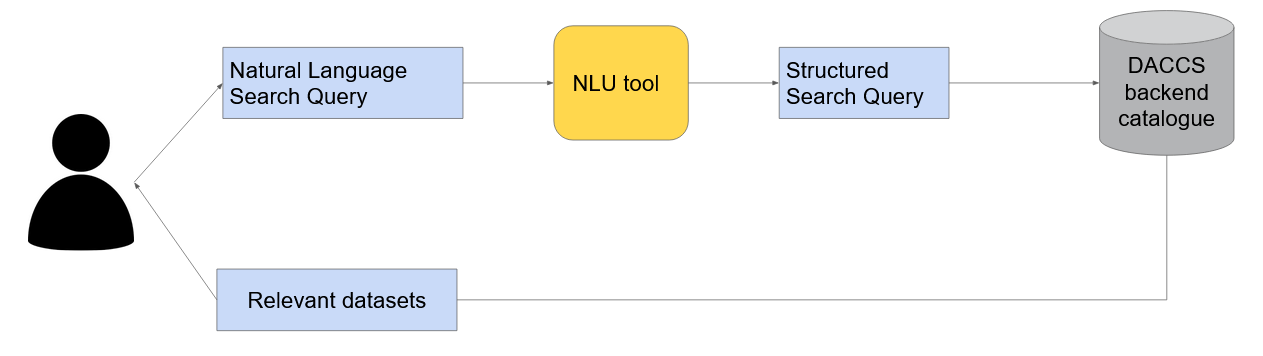

In [1]:
# initialize the demo class
from nlu_demo import NLU_demo
nlu = NLU_demo(verbose=False)

/home/francis/.conda/envs/pavics-jupyter-images-nlp/lib/python3.9/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/francis/.conda/envs/pavics-jupyter-images-nlp/lib/python3.9/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Reading config file:  /home/francis/dev/daccs/pavics-jupyter-images/nlp/notebooks/stac_wrapper/stac_config.cfg


## 1. Natural language query

### Pick a query from the evaluation dataset 

In [2]:
# select a query from the dropdown list
nlu.select_gold_query()

Dropdown(description='Query:', index=11, layout=Layout(width='max-content'), options=('10 years rainfall data …

In [3]:
# optionally: view the gold annotations
nlu.get_gold_annotations()

{'query': 'CO2 concentration in atmosphere in london',
 'annotations': [{'text': 'london',
   'position': [35, 41],
   'type': 'location',
   'matchingType': 'overlap',
   'name': 'London, England',
   'value': {'type': 'Polygon', 'coordinates': [[]]}},
  {'text': 'CO2 concentration in atmosphere',
   'position': [0, 31],
   'type': 'target',
   'name': ['mole fraction of carbon dioxide in air',
    'co2s',
    'co2',
    'Atmosphere CO2',
    'Mole Fraction of CO2']}]}

### OR define your own custom search query

In [4]:
# write your query here
nlu.custom_query(value="yearly precipitation over Ottawa between 2000 and 2020")

Textarea(value='yearly precipitation over Ottawa between 2000 and 2020', description='Your query:', layout=Lay…

## 2. Select NLU version

- V1: basic NER (SpaCy, Flair), HeidelTime, Textsearch
- V2: Chroma vector DB with CF standard names and CMIP6 vocabularies, Duckling, OSMNX geocoding
- V3: a combination of V1 and V2

In [5]:
nlu.select_nlu_version()

Select(description='System Version:', index=2, options=('V1', 'V2', 'V3'), rows=3, style=DescriptionStyle(desc…

## 3. Transform NL query to structured representation

The structured query is the intermediary structured representation of the natural language query that the NLU module produces. 

One query can have many annotations.
An annotation can be any of the four (4) types: 
- property: generic metadata properties and their values,
- location: disambiguated location name with its bounding box polygon coordinates,
- tempex: temporal expressions as datetime format. single valued or a range,
- target : list of climate variable standard names

**NOTE**<br>
On first run, the following call can take some time to download models and prepare vector databases.<br>
Once completed, subsequent runs should be faster by using cached files.

In [6]:
# if desired, verbosity can be modified here
# if enabled, each pipeline step will output intermediate results
nlu.verbose = False
# run the NLU pipeline on the natural language query
nlu.nl2query()

Reading config file:  /home/francis/dev/daccs/pavics-jupyter-images/nlp/notebooks/nl2query/V1/v1_config.cfg
Reading config file:  nl2query/V1/spacy_config.cfg
Reading config file:  nl2query/V1/flair_config.cfg
2023-12-12 10:38:34,066 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Reading config file:  /home/francis/dev/daccs/pavics-jupyter-images/nlp/notebooks/nl2query/V2/v2_config.cfg
Loading Chroma Vdb from... nl2query/V2/prop_vdb
Loading Chroma Vdb from... nl2query/V2/target_vdb


/home/francis/.conda/envs/pavics-jupyter-images-nlp/lib/python3.9/site-packages/langchain_core/vectorstores.py:325: UserWarning: No relevant docs were retrieved using the relevance score threshold 0.72
  warnings.warn(



V3 structured query: 
{'query': 'yearly precipitation over Ottawa between 2000 and 2020',
 'annotations': [{'text': 'precipitation',
                  'position': [7, 20],
                  'type': 'target',
                  'name': ['precipitation amount',
                           'stratiform precipitation amount',
                           'large scale precipitation amount',
                           'stratiform precipitation flux',
                           'large scale precipitation flux',
                           'stratiform rainfall amount',
                           'large scale rainfall amount',
                           'solid precipitation flux',
                           'stratiform rainfall rate',
                           'large scale rainfall rate',
                           'convective precipitation amount',
                           'lwe stratiform precipitation rate',
                           'lwe large scale precipitation rate',
                      

/home/francis/.conda/envs/pavics-jupyter-images-nlp/lib/python3.9/site-packages/langchain_core/vectorstores.py:325: UserWarning: No relevant docs were retrieved using the relevance score threshold 0.8
  warnings.warn(


## 4. Optionally - run against a STAC catalog (experimental)

Transform the structured query into a STAC query and execute it using [PySTAC-client](https://github.com/stac-utils/pystac-client) Python library.

Possible search criterias: [https://pystac-client.readthedocs.io/en/latest/usage.html#itemsearch](https://pystac-client.readthedocs.io/en/latest/usage.html#itemsearch)

We use the following parameters:

- collections, bbox, datetime, query (property/operator/value), max_items

### Select a catalog and execute the query

In [7]:
nlu.select_stac_catalog(catalog="earth_aws")

Dropdown(description='Select catalog:', index=3, options=('hirondelle_crim', 'uoft', 'pavics_ouranos', 'earth_…

In [8]:
# verbosity can be modified here to visualize the converted NL query to STAC query
nlu.verbose = True
nlu.run_stac_query()

Created STAC query with parameters:

{'bbox': (-76.3555857, 44.9617738, -75.2465783, 45.5376502),
 'datetime': ['2000-01-01T00:00:00Z', '2021-01-01T00:00:00Z'],
 'query': ['precipitation amount',
           'stratiform precipitation amount',
           'large scale precipitation amount',
           'stratiform precipitation flux',
           'large scale precipitation flux',
           'stratiform rainfall amount',
           'large scale rainfall amount',
           'solid precipitation flux',
           'stratiform rainfall rate',
           'large scale rainfall rate',
           'convective precipitation amount',
           'lwe stratiform precipitation rate',
           'lwe large scale precipitation rate',
           'tendency of specific humidity due to stratiform precipitation',
           'tendency of specific humidity due to large scale precipitation',
           'rainfall amount',
           'stratiform graupel fall amount',
           'solid precipitation flux containing si

[<Item id=S2B_18TVQ_20201231_1_L2A>,
 <Item id=S2B_18TVQ_20201231_1_L1C>,
 <Item id=S2B_18TVQ_20201231_0_L2A>,
 <Item id=S2B_18TVQ_20201231_0_L1C>,
 <Item id=S2B_18TVR_20201231_1_L2A>,
 <Item id=S2B_18TVR_20201231_1_L1C>,
 <Item id=S2B_18TVR_20201231_0_L2A>,
 <Item id=S2B_18TVR_20201231_0_L1C>,
 <Item id=S2A_18TUQ_20201229_1_L2A>,
 <Item id=S2A_18TUQ_20201229_0_L2A>]

### Run your own STAC query parameters

In [9]:
params = {
    'collections': [],
    'bbox': [-85.0, 45.0, -59.0, 80.0],
    'datetime': ['2021-02-02T00:00:00Z','2900-01-01T00:00:00Z'],
    'query' : ['institude_id:CCCS', 'project_id:CMIP6', 'frequency:day']
    }
nlu.select_stac_catalog(catalog="hirondelle_crim")
nlu.run_custom_stac_query(params) 

Opening catalog:  Data Analytics for Canadian Climate Services STAC API


[<Item id=50a6bcb4b9f7611dd82396e732a2deac>,
 <Item id=993de451f95b784bbbf36e1f36feecb4>,
 <Item id=17d2ecc11365a1954fbb0f64c6b0d5d8>,
 <Item id=3906b44ee284c7418dbc416dd0facf75>,
 <Item id=48ac204251a5e1b3c9658f55259e8e64>,
 <Item id=eeefe66e52c752fbc246150885271a70>,
 <Item id=7f86b95ea2b64297a681270fab6a75cd>,
 <Item id=b5571abe14914fdd667a06005f8e3013>,
 <Item id=4287c332ae3c554fc32cb1706f63b4af>,
 <Item id=ed83eed8620b92809e0d0e1d1cfd3925>]

In [10]:
# Select EARTH_AWS as catalog
# Example - Sentinel-2 on EARTH_AWS
params = {
    'collections': ['sentinel-2-l2a'],
    'bbox': [160.6, -55.95, 170, -25.89],
    'datetime': ['2020-04-01T00:00:00Z', '2022-09-30T00:00:00Z'],
    'query' : ['eo:cloud_cover>10']
    }
nlu.select_stac_catalog(catalog="earth_aws")
nlu.run_custom_stac_query(params)

Opening catalog:  Earth Search by Element 84


[<Item id=S2B_57FWU_20220929_0_L2A>,
 <Item id=S2B_57FXU_20220929_0_L2A>,
 <Item id=S2B_58FCD_20220929_0_L2A>,
 <Item id=S2B_57FWV_20220929_0_L2A>,
 <Item id=S2B_57FXV_20220929_0_L2A>,
 <Item id=S2B_58FCE_20220929_0_L2A>,
 <Item id=S2B_59JKG_20220929_0_L2A>,
 <Item id=S2B_59JLG_20220929_0_L2A>,
 <Item id=S2B_59JMG_20220929_0_L2A>,
 <Item id=S2B_58JGN_20220929_0_L2A>]